### Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

### Step 2: Load Data

In [3]:
ratings = pd.read_csv('cleaned_data.csv', usecols=['user_id', 'book_id', 'title', 'rating'])

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185684 entries, 0 to 1185683
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   title    1185682 non-null  object
 1   rating   1185684 non-null  int64 
 2   user_id  1185684 non-null  int64 
 3   book_id  1185684 non-null  object
dtypes: int64(2), object(2)
memory usage: 36.2+ MB


### Step 3: Cleaning Data

While preprocessing the data, all missing ratings were encoded as a 0. I only want to look at books that have been reviewed by users, so I will filter out all ratings less than 1. I will also make a separate data set books, which contains each book from ratings.

In [5]:

# removing null ratings (=0)
ratings = ratings[ratings['rating'] > 0]

books = ratings[['book_id', 'title']].drop_duplicates()

books['link'] = 'https://www.goodreads.com/book/show/' + books['book_id']

In [6]:
from scrape_metadata_recs import get_genres, parse_genres

compiled_genres = pd.DataFrame()

# chunk books
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

stacks_of_books = list(divide_chunks(books['link'], 20))

In [7]:
i = 0
for stack in stacks_of_books:

    if i < 400:
        i = i +1
    else:

        genres = get_genres(stack)

        genres['genre'] = genres['genre'].astype(str)

        genres_parsed = parse_genres(genres['genre'], 25)

        genres_parsed['link'] = genres['link']

        compiled_genres = pd.concat([compiled_genres, genres_parsed], axis=0)

        compiled_genres.to_csv('genres_compiled3.csv')
        
        i = i + 1

5.0%  complete


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=131.0.6778.69)
Stacktrace:
0   chromedriver                        0x0000000102ce9548 cxxbridge1$str$ptr + 3618920
1   chromedriver                        0x0000000102ce1d98 cxxbridge1$str$ptr + 3588280
2   chromedriver                        0x00000001027509c4 cxxbridge1$string$len + 89228
3   chromedriver                        0x000000010272bea0 core::str::slice_error_fail::ha0e52dbcb60e6bae + 3780
4   chromedriver                        0x00000001027bace0 cxxbridge1$string$len + 524200
5   chromedriver                        0x00000001027cdbbc cxxbridge1$string$len + 601732
6   chromedriver                        0x00000001027895c0 cxxbridge1$string$len + 321672
7   chromedriver                        0x000000010278a210 cxxbridge1$string$len + 324824
8   chromedriver                        0x0000000102cb54bc cxxbridge1$str$ptr + 3405788
9   chromedriver                        0x0000000102cb87dc cxxbridge1$str$ptr + 3418876
10  chromedriver                        0x0000000102c9c130 cxxbridge1$str$ptr + 3302480
11  chromedriver                        0x0000000102cb909c cxxbridge1$str$ptr + 3421116
12  chromedriver                        0x0000000102c8d888 cxxbridge1$str$ptr + 3242920
13  chromedriver                        0x0000000102cd29c8 cxxbridge1$str$ptr + 3525864
14  chromedriver                        0x0000000102cd2b44 cxxbridge1$str$ptr + 3526244
15  chromedriver                        0x0000000102ce1a0c cxxbridge1$str$ptr + 3587372
16  libsystem_pthread.dylib             0x00000001904fef94 _pthread_start + 136
17  libsystem_pthread.dylib             0x00000001904f9d34 thread_start + 8


In [ ]:
genres1= pd.read_csv('genres_compiled.csv')

genres2 = pd.read_csv('genres_combiled2')

genres3 = pd.read_csv('genres_compiled3.csv')

all_genres = 

### Step 4: Exploratory Data Analysis

In [12]:
n_ratings = len(ratings)
n_books = ratings['book_id'].nunique()
n_users = ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 774081
Number of unique books: 330634
Number of unique users: 1828
Average number of ratings per user: 423.46
Average number of ratings per book: 2.34


### What is the distribution of books ratings?

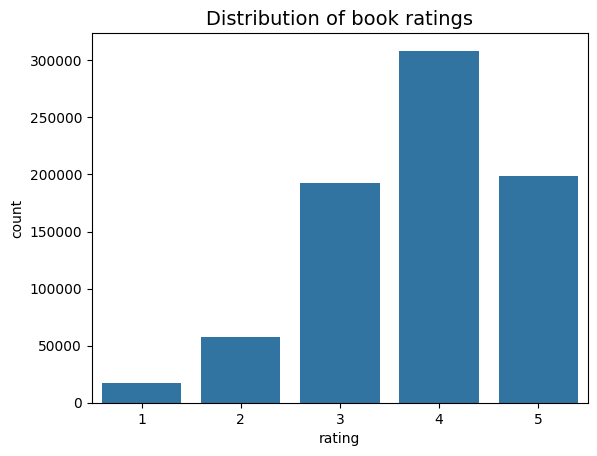

In [13]:
sns.countplot(x='rating', data = ratings)
plt.title("Distribution of book ratings", fontsize=14)
plt.show()

In [14]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

Mean global rating: 3.79.


In [15]:
mean_ratings = ratings.groupby('user_id')['rating'].mean()

print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 3.84.


### Which books are most frequently rated?

In [16]:
book_ratings = ratings.value_counts('title').reset_index()

print(book_ratings.head(20))

len(book_ratings[book_ratings['count'] > 20])


                                                title  count
0                        Monstress, Vol. 1: Awakening    575
1                                    The Great Gatsby    518
2                                Lessons in Chemistry    468
3                                  The Maltese Falcon    399
4   The Inheritance Games        (The Inheritance ...    393
5                                      The New Mother    384
6                                        Daisy Darker    377
7   How to Solve Your Own Murder        (Castle Kn...    377
8                                           Annie Bot    377
9   Heartstopper: Volume One        (Heartstopper,...    374
10          Confusion        (Cazalet Chronicles, #3)    372
11                         Notes from the Burning Age    372
12                                   Sunstone, Vol. 1    371
13             Shigidi and the Brass Head of Obalufon    370
14                                A Life in Questions    369
15                      

4737

### What are the lowest and highest rated books? 

Which book has the lowest and highest average rating?

In [17]:
mean_ratings = ratings.groupby('title')[['rating']].mean().reset_index().sort_values('rating', ascending =False)
lowest_rated = mean_ratings['rating'].idxmin()
highest_rated = mean_ratings['rating'].idxmax()

print(f'Lowest rated book: {mean_ratings.iloc[lowest_rated, 0]}')
print(f'Highest rated book: {mean_ratings.iloc[highest_rated, 0]}')


Lowest rated book: Nocturne        (87th Precinct, #48)
Highest rated book: !خرگوش گوش داد


#### Bayesian Average

Below I calculate the bayesian average to get a better idea what the average reader thinks of each book.

In [40]:
book_stats = ratings.groupby('book_id')['rating'].agg(['count', 'mean']).reset_index().sort_values('count', ascending=False)
book_stats.head()

,book_id,count,mean
204320,4671.The_Great_Gatsby,434,4.301843
254546,58065033-lessons-in-chemistry,392,3.505102
129305,29999.The_Maltese_Falcon,386,4.901554
59669,181350367-how-to-solve-your-own-murder,374,3.564171
38214,156023123-annie-bot,373,3.032172


In [19]:
C = book_stats['count'].mean()
m = book_stats['mean'].mean()

print(f"Average number of ratings for a given book: {C:.2f}")
print(f"Average rating for a given book: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given book: 2.34
Average rating for a given book: 3.75


In [20]:
bayesian_avg_ratings = ratings.groupby('book_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['book_id', 'bayesian_avg']
book_stats = book_stats.merge(bayesian_avg_ratings, on='book_id')

In [21]:
book_stats = book_stats.merge(books[['book_id', 'title']])
book_stats = book_stats.sort_values(by='bayesian_avg', ascending = False)
book_stats.head(5)

,book_id,count,mean,bayesian_avg,title
16,39968298-why-we-get-the-wrong-politicians,368,5.0,4.992,Why We Get the Wrong Politicians
11,4029946-the-unsettled-dust,369,5.0,4.992,The Unsettled Dust
15,202971275-david-whitaker-in-an-exciting-advent...,368,5.0,4.992,David Whitaker in an Exciting Adventure with T...
21,58309653-the-sun-makers,368,5.0,4.992,"The Sun Makers (The Black Archive, #60)"
17,123014815-ex-marginalia,368,5.0,4.992,Ex Marginalia: Essays from the Edges of Specul...


In [24]:
book_stats.sort_values('bayesian_avg', ascending=True).head()

,book_id,count,mean,bayesian_avg,title
235,36507266-boss-book-eight,158,1.0,1.040,Boss Book Eight
231,36558074-boss-book-seven,158,1.0,1.040,Boss Book Seven
354,36063739-sh-gun,122,1.0,1.052,Shōgun (Asian Saga: Chronological Order...
550,3077290-little-zizi,89,1.0,1.070,Little Zizi
994,11305860-psycho-ii,63,1.0,1.098,Psycho II


In [25]:
def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        book_mapper: dict that maps book id's to movie indices
        book_inv_mapper: dict that maps book indices to movie id's
    """
    M = df['user_id'].nunique()
    N = df['book_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    book_mapper = dict(zip(np.unique(df["book_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    book_inv_mapper = dict(zip(list(range(N)), np.unique(df["book_id"])))
    
    user_index = [user_mapper[i] for i in df["user_id"]]
    item_index = [book_mapper[i] for i in df["book_id"]]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_X(ratings[['user_id', 'book_id', 'rating']])

In [26]:
X.shape

(1828, 330634)

### Evaluating sparsity

In [27]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.12%


In [28]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

1828

In [29]:
print(f"Most active user rated {n_ratings_per_user.max()} books.")
print(f"Least active user rated {n_ratings_per_user.min()} books.")

Most active user rated 3858 books.
Least active user rated 1 books.


In [30]:
n_ratings_per_book = X.getnnz(axis=0)
len(n_ratings_per_book)

330634

In [31]:
print(f"Most rated book has {n_ratings_per_book.max()} ratings.")
print(f"Least rated book has {n_ratings_per_book.min()} ratings.")

Most rated book has 278 ratings.
Least rated book has 1 ratings.


/var/folders/8j/jqvkfjr12ns3lzbxz2m8scx00000gp/T/ipykernel_7912/3135468427.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
/var/folders/8j/jqvkfjr12ns3lzbxz2m8scx00000gp/T/ipykernel_7912/3135468427.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_book, shade=True)


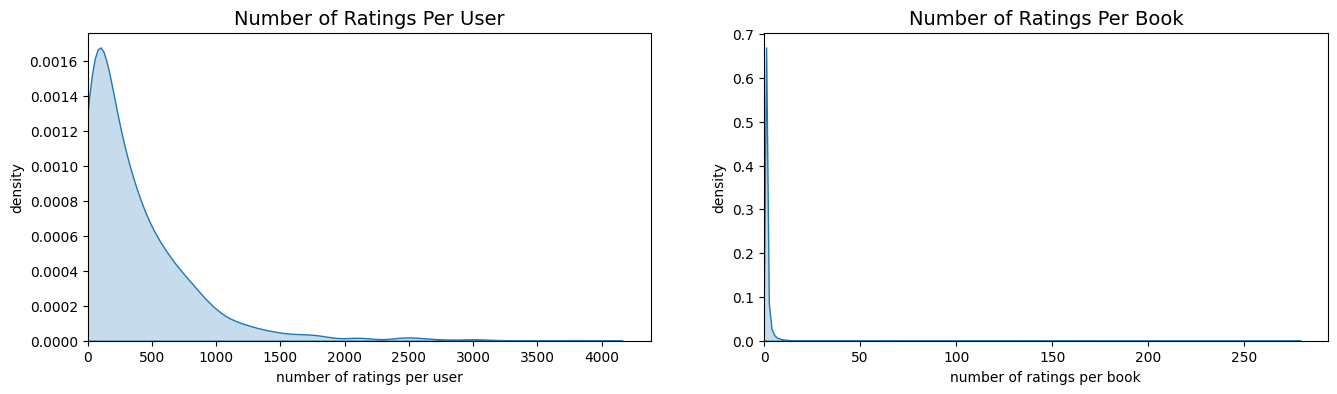

In [32]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_book, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Book", fontsize=14)
plt.xlabel("number of ratings per book")
plt.ylabel("density")
plt.show()

### Step 5: Item-item Recommendations with k-Nearest Neighbors

We are going to find the $k$ books that have the most similar user engagement vectors for book $i$.

In [38]:
from sklearn.neighbors import NearestNeighbors

def find_similar_books(book_id, X, book_mapper, book_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given book id.
    
    Args:
        movie_id: id of the book of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar book ID's
    """
    X = X.T
    neighbour_ids = []
    
    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    if isinstance(book_vec, (np.ndarray)):
        book_vec = book_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(book_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

## Step 6: Search for Book Recs
`find_similar_books()` takes in a `book_id` and `X` matrix, and outputs a list of $k$ books that are similar to the `book_id` of interest.

In [42]:
similar_books = find_similar_books('4671.The_Great_Gatsby', X, book_mapper, book_inv_mapper, k=10)
similar_books

['770265.Humility',
 '59951278-film-noir-portraits',
 '200323566-defeating-evil',
 '8197828-slayground',
 '62981559-dopamine-nation',
 '60094198-a-swim-in-a-pond-in-the-rain',
 '28075710-saving-my-assassin',
 '17288638-salem-s-lot',
 '43124148-carrie']

In [1]:
book_titles = dict(zip(books['book_id'], books['title']))

#book_id = '29044.The_Secret_History'
book_id = '57945316-babel'

similar_books = find_similar_books(book_id, X, book_mapper, book_inv_mapper, metric='cosine', k=10)
book_title = book_titles[book_id]

print(f"Because you liked {book_title}:")
for i in similar_books:
    print(book_titles[i])

NameError: name 'books' is not defined